In [1]:
import pandas as pd
import os
import seaborn as sns

In [2]:
jansen_sumstats = pd.read_csv("/home/eramamur/resources/gwas/AD_sumstats_Jansenetal.txt",
         sep='\t'
        )


In [3]:
kunkle_sumstats = pd.read_csv("/home/eramamur/resources/gwas/Kunkle_etal_Stage1_results_sorted.txt",
         sep=' '
        )

In [4]:
jansen_sumstats.head()

,uniqID.a1a2,CHR,BP,A1,A2,SNP,Z,P,Nsum,Neff,dir,MAF,BETA,SE
0,1:715265_T_C,1,715265,T,C,rs12184267,2.121973,0.03384,381761,381761.0,??+?,0.040807,0.012275,0.005785
1,1:715367_G_A,1,715367,G,A,rs12184277,1.957915,0.05024,382151,382151.0,??+?,0.041069,0.011285,0.005764
2,1:717485_A_C,1,717485,A,C,rs12184279,1.912438,0.05582,382180,382180.0,??+?,0.040576,0.011087,0.005797
3,1:720381_T_G,1,720381,T,G,rs116801199,2.295404,0.02171,382954,382954.0,??+?,0.042162,0.013052,0.005686
4,1:721290_C_G,1,721290,C,G,rs12565286,2.315602,0.02058,382779,382779.0,??+?,0.042378,0.013137,0.005673


In [5]:
kunkle_sumstats.head()

,Chromosome,Position,MarkerName,Effect_allele,Non_Effect_allele,Beta,SE,Pvalue
0,1,662622,rs61769339,A,G,-0.1000,0.0457,0.02869
1,1,693625,NaN,T,C,-0.0163,0.0685,0.81200
2,1,693731,rs61769350,A,G,0.0996,0.0413,0.01598
3,1,705882,rs72631875,A,G,-0.0184,0.0595,0.75740
4,1,718505,rs181440659,A,G,-0.1628,0.1362,0.23200


In [8]:
sig_snps = set(["rs636317",
            "rs1010322",
            "rs2526377",
            "rs76726049",
            "rs28834970",
            "rs636317",
            "rs6064392",
            "rs395601",
            "rs636317",
            "rs636341",
            "rs28834970",
            "rs636317",
            "rs28834970",
            "rs514049",
            "rs6064392",
            "rs2526377",
            "rs636317",
            "rs2526377",
            "rs75045569",
            "rs6064392",
            "rs28834970",
            "rs514049",
            "rs1010322",
            "rs73223431",
            "rs514049",
            "rs111278892",
            "rs4575098",
            "rs9271170",
            "rs61481506" 
           ])

In [9]:
sig_snps

{'rs1010322',
 'rs111278892',
 'rs2526377',
 'rs28834970',
 'rs395601',
 'rs4575098',
 'rs514049',
 'rs6064392',
 'rs61481506',
 'rs636317',
 'rs636341',
 'rs73223431',
 'rs75045569',
 'rs76726049',
 'rs9271170'}

In [10]:
window = 1000000

In [11]:
out_path = "/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ad_variants_processing/finemapping"

In [12]:
for snp in sig_snps:
    jansen_snp_row = jansen_sumstats.loc[jansen_sumstats['SNP']==snp]
    kunkle_snp_row = kunkle_sumstats.loc[kunkle_sumstats['MarkerName']==snp]
    
    jansen_snp_chr = jansen_snp_row['CHR'].values[0]
    jansen_snp_pos = jansen_snp_row['BP'].values[0]
    jansen_nearby_snps = jansen_sumstats.loc[(jansen_sumstats['CHR']==jansen_snp_chr) &
                                             (jansen_sumstats['BP'] > jansen_snp_pos-window) &
                                             (jansen_sumstats['BP'] < jansen_snp_pos+window)
                                            ]
    
    kunkle_snp_chr = kunkle_snp_row['Chromosome'].values[0]
    kunkle_snp_pos = kunkle_snp_row['Position'].values[0]
    kunkle_nearby_snps = kunkle_sumstats.loc[(kunkle_sumstats['Chromosome']==kunkle_snp_chr) &
                                             (kunkle_sumstats['Position']>kunkle_snp_pos-window) &
                                             (kunkle_sumstats['Position']<kunkle_snp_pos+window)
                                            ]
 
    jansen_nearby_snps.to_csv(os.path.join(out_path, f'{snp}_jansen_nearby_snps_sumstats.txt'),
                              index=False,
                              sep='\t',
                              header=True
                             )
    kunkle_nearby_snps.to_csv(os.path.join(out_path, f'{snp}_kunkle_nearby_snps_sumstats.txt'),
                              index=False,
                              sep='\t',
                              header=True
                             )

In [13]:
jansen_sumstats.loc[jansen_sumstats['SNP'].isin(sig_snps)]

,uniqID.a1a2,CHR,BP,A1,A2,SNP,Z,P,Nsum,Neff,dir,MAF,BETA,SE
603921,1:161155392_A_G,1,161155392,A,G,rs4575098,6.357436,2.051494e-10,456442,449728.29,?+++,0.228026,0.015976,0.002513
5191762,6:32577889_T_C,6,32577889,T,C,rs9271170,5.407864,6.378088e-08,458662,451928.90,?+++,0.280798,0.012657,0.002341
6593221,7:143109208_G_T,7,143109208,G,T,rs75045569,-5.690868,1.263954e-08,457616,450892.03,?---,0.160795,-0.016313,0.002867
6880665,8:27195121_C_T,8,27195121,C,T,rs28834970,6.801402,1.036059e-11,456907,450189.23,?+++,0.365676,0.014882,0.002188
6880774,8:27219987_T_C,8,27219987,T,C,rs73223431,6.769950,1.288265e-11,454568,447870.71,?+++,0.366508,0.014844,0.002193
8989279,11:60019150_C_T,11,60019150,C,T,rs636317,-7.302253,2.829881e-13,458638,451905.11,?---,0.391130,-0.015739,0.002155
8989280,11:60019161_A_C,11,60019161,A,C,rs636341,-7.283947,3.241916e-13,458640,451907.10,?---,0.387419,-0.015726,0.002159
11067464,15:59042363_A_C,15,59042363,A,C,rs514049,-4.132687,3.585475e-05,455303,448599.27,?--+,0.442408,-0.008784,0.002126
11067563,15:59063196_C_G,15,59063196,C,G,rs395601,-4.545786,5.473062e-06,455140,448437.69,?--+,0.419757,-0.009726,0.002140
11722472,17:5158714_C_T,17,5158714,C,T,rs61481506,5.962110,2.490021e-09,456323,449610.34,?+++,0.121882,0.019218,0.003223


In [14]:
kunkle_sumstats.loc[kunkle_sumstats['MarkerName'].isin(sig_snps)]

,Chromosome,Position,MarkerName,Effect_allele,Non_Effect_allele,Beta,SE,Pvalue
509374,1,161155392,rs4575098,A,G,0.0378,0.0167,2.339000e-02
4460293,6,32577889,rs9271170,T,C,0.0917,0.0172,9.017000e-08
5659327,7,143109208,rs75045569,T,G,0.1040,0.0195,1.028000e-07
5908023,8,27195121,rs28834970,T,C,-0.0921,0.0153,1.577000e-09
5908110,8,27219987,rs73223431,T,C,0.0936,0.0153,8.342000e-10
7713418,11,60019150,rs636317,T,C,0.1135,0.0145,5.906000e-15
7713419,11,60019161,rs636341,A,C,-0.1140,0.0146,4.957000e-15
9529754,15,59042363,rs514049,A,C,-0.0450,0.0145,1.938000e-03
9529817,15,59063196,rs395601,C,G,-0.0488,0.0147,9.125000e-04
10073447,17,5158714,rs61481506,T,C,-0.0827,0.0222,1.989000e-04


In [15]:
kunkle_sumstats.loc[kunkle_sumstats['MarkerName']=='rs9271182']

,Chromosome,Position,MarkerName,Effect_allele,Non_Effect_allele,Beta,SE,Pvalue
4460313,6,32578230,rs9271182,A,G,0.0908,0.0172,1.289000e-07


/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


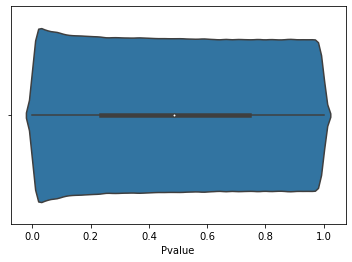

In [6]:
sns.violinplot(kunkle_sumstats['Pvalue'])

/home/eramamur/bin/miniconda3/envs/data_analysis/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


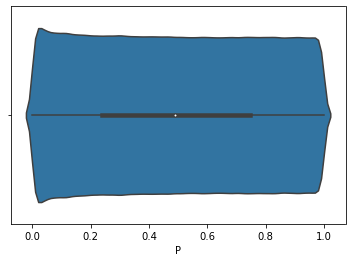

In [7]:
sns.violinplot(jansen_sumstats['P'])